In [1]:
def gradient_descent_bold_driver(f, df, initial_x, alpha, beta, max_iterations=1000, tolerance=1e-6):
    x = initial_x
    learning_rate = 1.0  # Initial learning rate
    losses = []
    
    for iteration in range(max_iterations):
        gradient = df(x)
        new_x = x - learning_rate * gradient
        
        # Check if the loss improves
        if f(new_x) < f(x):
            x = new_x
            learning_rate *= alpha  # Increase learning rate
        else:
            learning_rate *= beta  # Decrease learning rate
        
        loss = f(x)
        losses.append(loss)
        
        if iteration % 10 == 0:
            print(f"Iteration {iteration}: x = {x}, Loss = {loss}")
        
        if len(losses) > 1 and abs(losses[-1] - losses[-2]) < tolerance:
            print(f"Converged after {iteration} iterations.")
            break
    
    return x, losses

# Define the function and its gradient
def f(x):
    return x**2 * np.cos(x) + np.sin(x) - x

def df(x):
    return 2 * x * np.cos(x) - x**2 * np.sin(x) + np.cos(x) - 1

# Apply Bold Driver Algorithm
import numpy as np

initial_x = 1.0
alpha = 1.1  # Increase factor
beta = 0.5   # Decrease factor

optimal_x, losses_bold_driver = gradient_descent_bold_driver(f, df, initial_x, alpha, beta)


Iteration 0: x = 1.2205640672034772, Loss = 0.22989514638113717
Converged after 4 iterations.


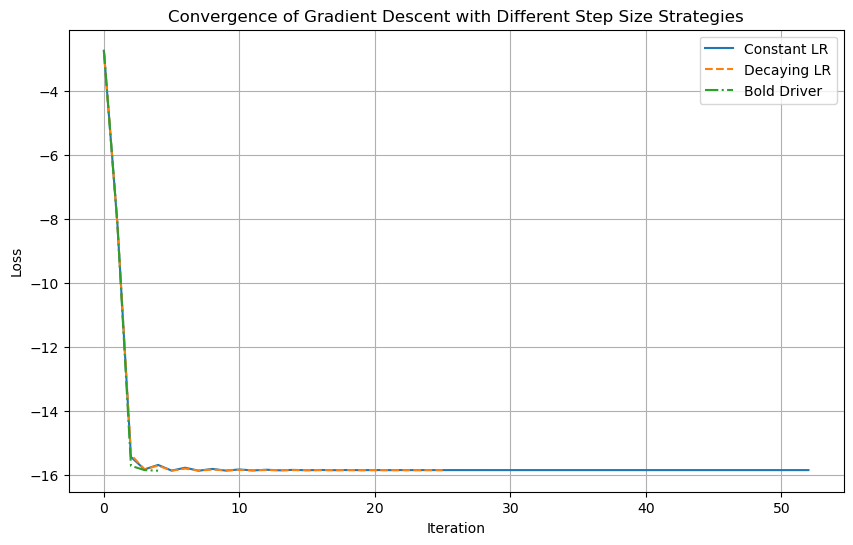

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function
def loss_function(x):
    return x**2 * np.cos(x) + np.sin(x) - x

# Gradient of the loss function (for demonstration purposes)
def gradient(x):
    return (2 * x * np.cos(x) - x**2 * np.sin(x) - 1)

# Gradient Descent with a constant step size
def gradient_descent_constant_lr(lr, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]

    for _ in range(max_iterations):
        x -= lr * gradient(x)
        x_values.append(x)
        loss = loss_function(x)
        losses.append(loss)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return x_values, losses

# Gradient Descent with a decaying step size (e.g., linear decay)
def gradient_descent_decaying_lr(a0, k, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    lr = a0

    for _ in range(max_iterations):
        x -= lr * gradient(x)
        x_values.append(x)
        loss = loss_function(x)
        losses.append(loss)
        lr = a0 / (1 + k * len(x_values))

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return x_values, losses

# Bold Driver Algorithm for Gradient Descent
def gradient_descent_bold_driver(a0, expansion_factor, shrinkage_factor, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    lr = a0

    for _ in range(max_iterations):
        x_new = x - lr * gradient(x)
        loss_new = loss_function(x_new)

        if loss_new < losses[-1]:
            x = x_new
            losses.append(loss_new)
            lr *= expansion_factor  # Increase learning rate
        else:
            lr *= shrinkage_factor  # Decrease learning rate

        x_values.append(x)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return x_values, losses

# Run gradient descent for each method
lr_constant = 0.1
a0_decaying = 0.1
k_decaying = 0.01
a0_bold_driver = 0.1
expansion_factor = 1.1
shrinkage_factor = 0.5

x_values_constant, losses_constant = gradient_descent_constant_lr(lr_constant)
x_values_decaying, losses_decaying = gradient_descent_decaying_lr(a0_decaying, k_decaying)
x_values_bold_driver, losses_bold_driver = gradient_descent_bold_driver(a0_bold_driver, expansion_factor, shrinkage_factor)

# Plot the convergence of all three methods
plt.figure(figsize=(10, 6))
plt.plot(range(len(losses_constant)), losses_constant, label='Constant LR', linestyle='-')
plt.plot(range(len(losses_decaying)), losses_decaying, label='Decaying LR', linestyle='--')
plt.plot(range(len(losses_bold_driver)), losses_bold_driver, label='Bold Driver', linestyle='-.')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence of Gradient Descent with Different Step Size Strategies')
plt.legend()
plt.grid(True)
plt.show()


ValueError: x and y must have same first dimension, but have shapes (1001,) and (5,)

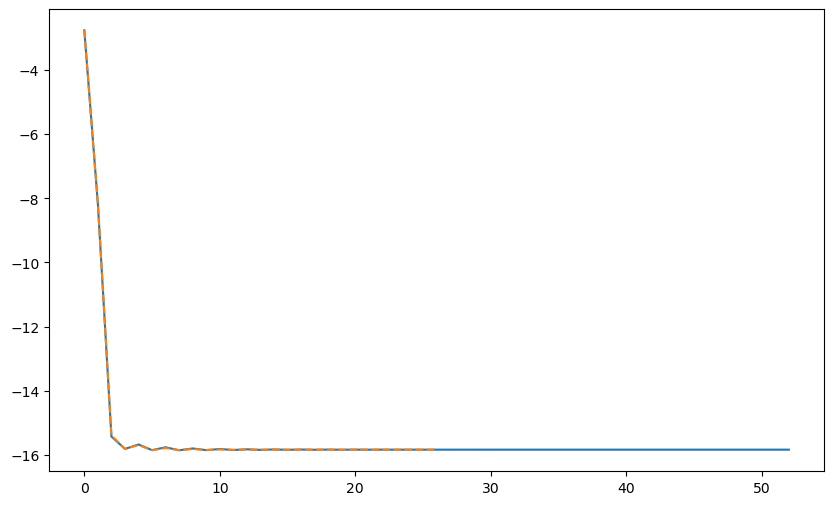

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function
def loss_function(x):
    return x**2 * np.cos(x) + np.sin(x) - x

# Gradient of the loss function (for demonstration purposes)
def gradient(x):
    return (2 * x * np.cos(x) - x**2 * np.sin(x) - 1)

# Gradient Descent with a constant step size
def gradient_descent_constant_lr(lr, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    iterations = [0]  # Store the iteration number

    for i in range(1, max_iterations + 1):
        x -= lr * gradient(x)
        x_values.append(x)
        loss = loss_function(x)
        losses.append(loss)
        iterations.append(i)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return iterations, x_values, losses

# Gradient Descent with a decaying step size (e.g., linear decay)
def gradient_descent_decaying_lr(a0, k, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    iterations = [0]  # Store the iteration number
    lr = a0

    for i in range(1, max_iterations + 1):
        x -= lr * gradient(x)
        x_values.append(x)
        loss = loss_function(x)
        losses.append(loss)
        lr = a0 / (1 + k * i)
        iterations.append(i)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return iterations, x_values, losses

# Bold Driver Algorithm for Gradient Descent
def gradient_descent_bold_driver(a0, expansion_factor, shrinkage_factor, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    iterations = [0]  # Store the iteration number
    lr = a0

    for i in range(1, max_iterations + 1):
        x_new = x - lr * gradient(x)
        loss_new = loss_function(x_new)

        if loss_new < losses[-1]:
            x = x_new
            losses.append(loss_new)
            lr *= expansion_factor  # Increase learning rate
        else:
            lr *= shrinkage_factor  # Decrease learning rate

        x_values.append(x)
        iterations.append(i)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return iterations, x_values, losses

# Run gradient descent for each method and get x, y values
lr_constant = 0.1
a0_decaying = 0.1
k_decaying = 0.01
a0_bold_driver = 0.1
expansion_factor = 1.1
shrinkage_factor = 0.5

iterations_constant, x_values_constant, losses_constant = gradient_descent_constant_lr(lr_constant)
iterations_decaying, x_values_decaying, losses_decaying = gradient_descent_decaying_lr(a0_decaying, k_decaying)
iterations_bold_driver, x_values_bold_driver, losses_bold_driver = gradient_descent_bold_driver(a0_bold_driver, expansion_factor, shrinkage_factor)

# Plot the convergence of all three methods
plt.figure(figsize=(10, 6))
plt.plot(iterations_constant, losses_constant, label='Constant LR', linestyle='-')
plt.plot(iterations_decaying, losses_decaying, label='Decaying LR', linestyle='--')
plt.plot(iterations_bold_driver, losses_bold_driver, label='Bold Driver', linestyle='-.')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence of Gradient Descent with Different Step Size Strategies')
plt.legend()
plt.grid(True)
plt.show()

# Display x and y values (iteration and loss) for one of the methods (e.g., Constant LR)
print("Constant LR:")
for i, (iteration, loss) in enumerate(zip(iterations_constant, losses_constant)):
    print(f"Iteration {iteration}: Loss = {loss}")


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function
def loss_function(x):
    return x**2 * np.cos(x) + np.sin(x) - x

# Gradient of the loss function (for demonstration purposes)
def gradient(x):
    return (2 * x * np.cos(x) - x**2 * np.sin(x) - 1)

# Gradient Descent with a constant step size
def gradient_descent_constant_lr(lr, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    iterations = [0]  # Store the iteration number

    for i in range(1, max_iterations + 1):
        x -= lr * gradient(x)
        x_values.append(x)
        loss = loss_function(x)
        losses.append(loss)
        iterations.append(i)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return iterations, x_values, losses

# Gradient Descent with a decaying step size (e.g., linear decay)
def gradient_descent_decaying_lr(a0, k, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    iterations = [0]  # Store the iteration number
    lr = a0

    for i in range(1, max_iterations + 1):
        x -= lr * gradient(x)
        x_values.append(x)
        loss = loss_function(x)
        losses.append(loss)
        lr = a0 / (1 + k * i)
        iterations.append(i)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return iterations, x_values, losses

# Bold Driver Algorithm for Gradient Descent
def gradient_descent_bold_driver(a0, expansion_factor, shrinkage_factor, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    iterations = [0]  # Store the iteration number
    lr = a0

    for i in range(1, max_iterations + 1):
        x_new = x - lr * gradient(x)
        loss_new = loss_function(x_new)

        if loss_new < losses[-1]:
            x = x_new
            losses.append(loss_new)
            lr *= expansion_factor  # Increase learning rate
        else:
            lr *= shrinkage_factor  # Decrease learning rate

        x_values.append(x)
        iterations.append(i)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return iterations, x_values, losses

# Run gradient descent for each method and get x, y values
lr_constant = 0.1
a0_decaying = 0.1
k_decaying = 0.01
a0_bold_driver = 0.1
expansion_factor = 1.1
shrinkage_factor = 0.5

iterations_constant, x_values_constant, losses_constant = gradient_descent_constant_lr(lr_constant)
iterations_decaying, x_values_decaying, losses_decaying = gradient_descent_decaying_lr(a0_decaying, k_decaying)
iterations_bold_driver, x_values_bold_driver, losses_bold_driver = gradient_descent_bold_driver(a0_bold_driver, expansion_factor, shrinkage_factor)

# Ensure all arrays have the same length by padding the shorter ones with NaN values
max_iterations = max(len(iterations_constant), len(iterations_decaying), len(iterations_bold_driver))

iterations_constant = np.pad(iterations_constant, (0, max_iterations - len(iterations_constant)), mode='constant', constant_values=placeholder_value)
iterations_decaying = np.pad(iterations_decaying, (0, max_iterations - len(iterations_decaying)), mode='constant', constant_values=placeholder_value)
iterations_bold_driver = np.pad(iterations_bold_driver, (0, max_iterations - len(iterations_bold_driver)), mode='constant', constant_values=placeholder_value)

losses_constant = np.pad(losses_constant, (0, max_iterations - len(losses_constant)), mode='constant', constant_values=np.nan)
losses_decaying = np.pad(losses_decaying, (0, max_iterations - len(losses_decaying)), mode='constant', constant_values=np.nan)
losses_bold_driver = np.pad(losses_bold_driver, (0, max_iterations - len(losses_bold_driver)), mode='constant', constant_values=np.nan)

# Plot the convergence of all three methods
plt.figure(figsize=(10, 6))
plt.plot(iterations_constant, losses_constant, label='Constant LR', linestyle='-')
plt.plot(iterations_decaying, losses_decaying, label='Decaying LR', linestyle='--')
plt.plot(iterations_bold_driver, losses_bold_driver, label='Bold Driver', linestyle='-.')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence of Gradient Descent with Different Step Size Strategies')
plt.legend()
plt.grid(True)
plt.show()

# Display x and y values (iteration and loss) for one of the methods (e.g., Constant LR)
print("Constant LR:")
for i, (iteration, loss) in enumerate(zip(iterations_constant, losses_constant)):
    print(f"Iteration {iteration}: Loss = {loss}")


NameError: name 'placeholder_value' is not defined

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function
def loss_function(x):
    return x**2 * np.cos(x) + np.sin(x) - x

# Gradient of the loss function (for demonstration purposes)
def gradient(x):
    return (2 * x * np.cos(x) - x**2 * np.sin(x) - 1)

# Gradient Descent with a constant step size
def gradient_descent_constant_lr(lr, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    iterations = [0]  # Store the iteration number

    for i in range(1, max_iterations + 1):
        x -= lr * gradient(x)
        x_values.append(x)
        loss = loss_function(x)
        losses.append(loss)
        iterations.append(i)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return iterations, x_values, losses

# Gradient Descent with a decaying step size (e.g., linear decay)
def gradient_descent_decaying_lr(a0, k, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    iterations = [0]  # Store the iteration number
    lr = a0

    for i in range(1, max_iterations + 1):
        x -= lr * gradient(x)
        x_values.append(x)
        loss = loss_function(x)
        losses.append(loss)
        lr = a0 / (1 + k * i)
        iterations.append(i)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return iterations, x_values, losses

# Bold Driver Algorithm for Gradient Descent
def gradient_descent_bold_driver(a0, expansion_factor, shrinkage_factor, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    iterations = [0]  # Store the iteration number
    lr = a0

    for i in range(1, max_iterations + 1):
        x_new = x - lr * gradient(x)
        loss_new = loss_function(x_new)

        if loss_new < losses[-1]:
            x = x_new
            losses.append(loss_new)
            lr *= expansion_factor  # Increase learning rate
        else:
            lr *= shrinkage_factor  # Decrease learning rate

        x_values.append(x)
        iterations.append(i)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return iterations, x_values, losses

# Run gradient descent for each method and get x, y values
lr_constant = 0.1
a0_decaying = 0.1
k_decaying = 0.01
a0_bold_driver = 0.1
expansion_factor = 1.1
shrinkage_factor = 0.5

iterations_constant, x_values_constant, losses_constant = gradient_descent_constant_lr(lr_constant)
iterations_decaying, x_values_decaying, losses_decaying = gradient_descent_decaying_lr(a0_decaying, k_decaying)
iterations_bold_driver, x_values_bold_driver, losses_bold_driver = gradient_descent_bold_driver(a0_bold_driver, expansion_factor, shrinkage_factor)

# Choose a placeholder value for padding (e.g., a large positive float)
placeholder_value = np.inf

# Replace NaN with the placeholder value in the arrays
max_iterations = max(len(iterations_constant), len(iterations_decaying), len(iterations_bold_driver))
iterations_constant = np.pad(iterations_constant, (0, max_iterations - len(iterations_constant)), mode='constant', constant_values=placeholder_value)
iterations_decaying = np.pad(iterations_decaying, (0, max_iterations - len(iterations_decaying)), mode='constant', constant_values=placeholder_value)
iterations_bold_driver = np.pad(iterations_bold_driver, (0, max_iterations - len(iterations_bold_driver)), mode='constant', constant_values=placeholder_value)

# Replace the placeholder value with NaN
iterations_constant[np.isinf(iterations_constant)] = np.nan
iterations_decaying[np.isinf(iterations_decaying)] = np.nan
iterations_bold_driver[np.isinf(iterations_bold_driver)] = np.nan

# Plot the convergence of all three methods
plt.figure(figsize=(10, 6))
plt.plot(iterations_constant, losses_constant, label='Constant LR', linestyle='-')
plt.plot(iterations_decaying, losses_decaying, label='Decaying LR', linestyle='--')
plt.plot(iterations_bold_driver, losses_bold_driver, label='Bold Driver', linestyle='-.')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence of Gradient Descent with Different Step Size Strategies')
plt.legend()
plt.grid(True)
plt.show()

# Display x and y values (iteration and loss) for one of the methods (e.g., Constant LR)
print("Constant LR:")
for i, (iteration, loss) in enumerate(zip(iterations_constant, losses_constant)):
    print(f"Iteration {iteration}: Loss = {loss}")


OverflowError: cannot convert float infinity to integer

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function
def loss_function(x):
    return x**2 * np.cos(x) + np.sin(x) - x

# Gradient of the loss function (for demonstration purposes)
def gradient(x):
    return (2 * x * np.cos(x) - x**2 * np.sin(x) - 1)

# Gradient Descent with a constant step size
def gradient_descent_constant_lr(lr, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    iterations = [0]  # Store the iteration number

    for i in range(1, max_iterations + 1):
        x -= lr * gradient(x)
        x_values.append(x)
        loss = loss_function(x)
        losses.append(loss)
        iterations.append(i)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return iterations, x_values, losses

# Gradient Descent with a decaying step size (e.g., linear decay)
def gradient_descent_decaying_lr(a0, k, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    iterations = [0]  # Store the iteration number
    lr = a0

    for i in range(1, max_iterations + 1):
        x -= lr * gradient(x)
        x_values.append(x)
        loss = loss_function(x)
        losses.append(loss)
        lr = a0 / (1 + k * i)
        iterations.append(i)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return iterations, x_values, losses

# Bold Driver Algorithm for Gradient Descent
def gradient_descent_bold_driver(a0, expansion_factor, shrinkage_factor, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    iterations = [0]  # Store the iteration number
    lr = a0

    for i in range(1, max_iterations + 1):
        x_new = x - lr * gradient(x)
        loss_new = loss_function(x_new)

        if loss_new < losses[-1]:
            x = x_new
            losses.append(loss_new)
            lr *= expansion_factor  # Increase learning rate
        else:
            lr *= shrinkage_factor  # Decrease learning rate

        x_values.append(x)
        iterations.append(i)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return iterations, x_values, losses

# Run gradient descent for each method and get x, y values
lr_constant = 0.1
a0_decaying = 0.1
k_decaying = 0.01
a0_bold_driver = 0.1
expansion_factor = 1.1
shrinkage_factor = 0.5

iterations_constant, x_values_constant, losses_constant = gradient_descent_constant_lr(lr_constant)
iterations_decaying, x_values_decaying, losses_decaying = gradient_descent_decaying_lr(a0_decaying, k_decaying)
iterations_bold_driver, x_values_bold_driver, losses_bold_driver = gradient_descent_bold_driver(a0_bold_driver, expansion_factor, shrinkage_factor)

# Choose a placeholder value for padding (e.g., -1)
placeholder_value = -1

# Replace NaN with the placeholder value in the arrays
max_iterations = max(len(iterations_constant), len(iterations_decaying), len(iterations_bold_driver))
iterations_constant = np.pad(iterations_constant, (0, max_iterations - len(iterations_constant)), mode='constant', constant_values=placeholder_value)
iterations_decaying = np.pad(iterations_decaying, (0, max_iterations - len(iterations_decaying)), mode='constant', constant_values=placeholder_value)
iterations_bold_driver = np.pad(iterations_bold_driver, (0, max_iterations - len(iterations_bold_driver)), mode='constant', constant_values=placeholder_value)

# Replace the placeholder value with NaN
iterations_constant[iterations_constant == placeholder_value] = np.nan
iterations_decaying[iterations_decaying == placeholder_value] = np.nan
iterations_bold_driver[iterations_bold_driver == placeholder_value] = np.nan

# Plot the convergence of all three methods
plt.figure(figsize=(10, 6))
plt.plot(iterations_constant, losses_constant, label='Constant LR', linestyle='-')
plt.plot(iterations_decaying, losses_decaying, label='Decaying LR', linestyle='--')
plt.plot(iterations_bold_driver, losses_bold_driver, label='Bold Driver', linestyle='-.')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence of Gradient Descent with Different Step Size Strategies')
plt.legend()
plt.grid(True)
plt.show()

# Display x and y values (iteration and loss) for one of the methods (e.g., Constant LR)
print("Constant LR:")
for i, (iteration, loss) in enumerate(zip(iterations_constant, losses_constant)):
    print(f"Iteration {iteration}: Loss = {loss}")


ValueError: cannot convert float NaN to integer

ValueError: x and y must have same first dimension, but have shapes (1001,) and (5,)

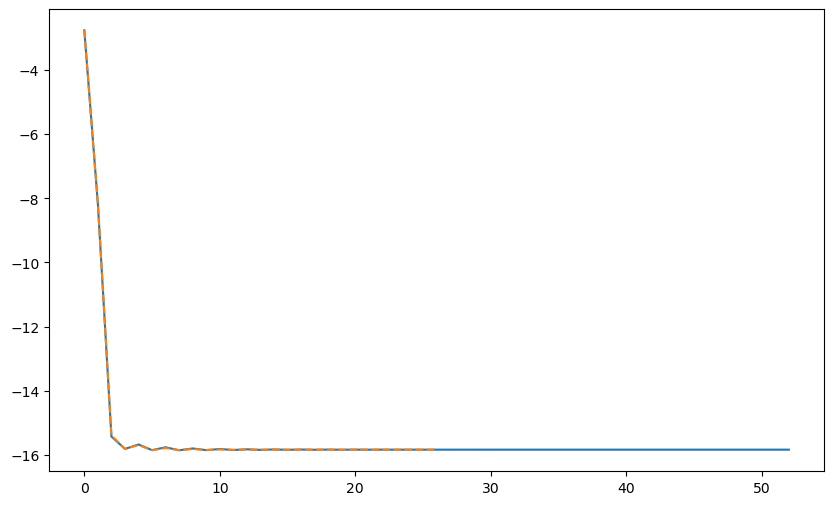

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function
def loss_function(x):
    return x**2 * np.cos(x) + np.sin(x) - x

# Gradient of the loss function (for demonstration purposes)
def gradient(x):
    return (2 * x * np.cos(x) - x**2 * np.sin(x) - 1)

# Gradient Descent with a constant step size
def gradient_descent_constant_lr(lr, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    iterations = [0]  # Store the iteration number

    for i in range(1, max_iterations + 1):
        x -= lr * gradient(x)
        x_values.append(x)
        loss = loss_function(x)
        losses.append(loss)
        iterations.append(i)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return iterations, x_values, losses

# Gradient Descent with a decaying step size (e.g., linear decay)
def gradient_descent_decaying_lr(a0, k, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    iterations = [0]  # Store the iteration number
    lr = a0

    for i in range(1, max_iterations + 1):
        x -= lr * gradient(x)
        x_values.append(x)
        loss = loss_function(x)
        losses.append(loss)
        lr = a0 / (1 + k * i)
        iterations.append(i)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return iterations, x_values, losses

# Bold Driver Algorithm for Gradient Descent
def gradient_descent_bold_driver(a0, expansion_factor, shrinkage_factor, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    iterations = [0]  # Store the iteration number
    lr = a0

    for i in range(1, max_iterations + 1):
        x_new = x - lr * gradient(x)
        loss_new = loss_function(x_new)

        if loss_new < losses[-1]:
            x = x_new
            losses.append(loss_new)
            lr *= expansion_factor  # Increase learning rate
        else:
            lr *= shrinkage_factor  # Decrease learning rate

        x_values.append(x)
        iterations.append(i)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return iterations, x_values, losses

# Run gradient descent for each method and get x, y values
lr_constant = 0.1
a0_decaying = 0.1
k_decaying = 0.01
a0_bold_driver = 0.1
expansion_factor = 1.1
shrinkage_factor = 0.5

iterations_constant, x_values_constant, losses_constant = gradient_descent_constant_lr(lr_constant)
iterations_decaying, x_values_decaying, losses_decaying = gradient_descent_decaying_lr(a0_decaying, k_decaying)
iterations_bold_driver, x_values_bold_driver, losses_bold_driver = gradient_descent_bold_driver(a0_bold_driver, expansion_factor, shrinkage_factor)

# Replace the placeholder value with NaN in the arrays
iterations_constant = np.array(iterations_constant, dtype=float)
iterations_decaying = np.array(iterations_decaying, dtype=float)
iterations_bold_driver = np.array(iterations_bold_driver, dtype=float)

# Plot the convergence of all three methods
plt.figure(figsize=(10, 6))
plt.plot(iterations_constant, losses_constant, label='Constant LR', linestyle='-')
plt.plot(iterations_decaying, losses_decaying, label='Decaying LR', linestyle='--')
plt.plot(iterations_bold_driver, losses_bold_driver, label='Bold Driver', linestyle='-.')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence of Gradient Descent with Different Step Size Strategies')
plt.legend()
plt.grid(True)
plt.show()

# Display x and y values (iteration and loss) for one of the methods (e.g., Constant LR)
print("Constant LR:")
for i, (iteration, loss) in enumerate(zip(iterations_constant, losses_constant)):
    print(f"Iteration {iteration}: Loss = {loss}")


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function
def loss_function(x):
    return x**2 * np.cos(x) + np.sin(x) - x

# Gradient of the loss function (for demonstration purposes)
def gradient(x):
    return (2 * x * np.cos(x) - x**2 * np.sin(x) - 1)

# Gradient Descent with a constant step size
def gradient_descent_constant_lr(lr, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    iterations = [0]  # Store the iteration number

    for i in range(1, max_iterations + 1):
        x -= lr * gradient(x)
        x_values.append(x)
        loss = loss_function(x)
        losses.append(loss)
        iterations.append(i)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return iterations, x_values, losses

# Gradient Descent with a decaying step size (e.g., linear decay)
def gradient_descent_decaying_lr(a0, k, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    iterations = [0]  # Store the iteration number
    lr = a0

    for i in range(1, max_iterations + 1):
        x -= lr * gradient(x)
        x_values.append(x)
        loss = loss_function(x)
        losses.append(loss)
        lr = a0 / (1 + k * i)
        iterations.append(i)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return iterations, x_values, losses

# Bold Driver Algorithm for Gradient Descent
def gradient_descent_bold_driver(a0, expansion_factor, shrinkage_factor, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    iterations = [0]  # Store the iteration number
    lr = a0

    for i in range(1, max_iterations + 1):
        x_new = x - lr * gradient(x)
        loss_new = loss_function(x_new)

        if loss_new < losses[-1]:
            x = x_new
            losses.append(loss_new)
            lr *= expansion_factor  # Increase learning rate
        else:
            lr *= shrinkage_factor  # Decrease learning rate

        x_values.append(x)
        iterations.append(i)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return iterations, x_values, losses

# Run gradient descent for each method and get x, y values
lr_constant = 0.1
a0_decaying = 0.1
k_decaying = 0.01
a0_bold_driver = 0.1
expansion_factor = 1.1
shrinkage_factor = 0.5

# Get x, y values for each method separately
iterations_constant, x_values_constant, losses_constant = gradient_descent_constant_lr(lr_constant)
iterations_decaying, x_values_decaying, losses_decaying = gradient_descent_decaying_lr(a0_decaying, k_decaying)
iterations_bold_driver, x_values_bold_driver, losses_bold_driver = gradient_descent_bold_driver(a0_bold_driver, expansion_factor, shrinkage_factor)

# Ensure all arrays have the same length by padding the shorter ones with NaN values
max_iterations = max(len(iterations_constant), len(iterations_decaying), len(iterations_bold_driver))

iterations_constant = np.pad(iterations_constant, (0, max_iterations - len(iterations_constant)), mode='constant', constant_values=np.nan)
iterations_decaying = np.pad(iterations_decaying, (0, max_iterations - len(iterations_decaying)), mode='constant', constant_values=np.nan)
iterations_bold_driver = np.pad(iterations_bold_driver, (0, max_iterations - len(iterations_bold_driver)), mode='constant', constant_values=np.nan)

losses_constant = np.pad(losses_constant, (0, max_iterations - len(losses_constant)), mode='constant', constant_values=np.nan)
losses_decaying = np.pad(losses_decaying, (0, max_iterations - len(losses_decaying)),


SyntaxError: unexpected EOF while parsing (3089619458.py, line 100)

[0.38127787148036796, 0.38074531440211556, 0.38017263556313385, 0.37955658942018156, 0.37889364336199893, 0.3781799495567908, 0.37741131371840475, 0.37658316041510354, 0.3756904944939421, 0.374727858135264, 0.37368928298452664, 0.37256823673109407, 0.3713575634140782, 0.37004941663176005, 0.36863518471119106, 0.36710540675541425, 0.3654496783240402, 0.363656545314621, 0.3617133843926854, 0.3596062680617249, 0.3573198121640899, 0.35483700325154843, 0.352139002850437, 0.3492049251591962, 0.3460115841415108, 0.34253320529931686, 0.33874109660598384, 0.33460327212622043, 0.33008402071552, 0.3251434108416307, 0.31973672095914996, 0.3138137829416823, 0.30731822376801454, 0.30018658788895514, 0.2923473193714339, 0.2837195789061737, 0.27421186592812874, 0.263720410256125, 0.25212729059196004, 0.2392982286648555, 0.2250799974440194, 0.20929736928373455, 0.19174951464960888, 0.17220574365384578, 0.15040046036256793, 0.12602717299899102, 0.09873137094437823, 0.06810204098487582, 0.033661549753762

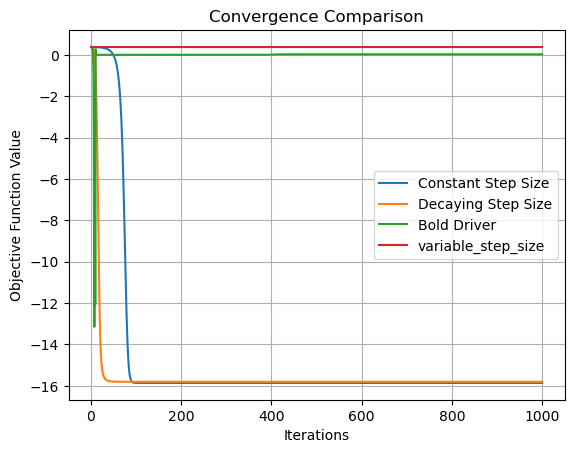

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define your function f(x)
def f(x):
    return x**2 * np.cos(x) + np.sin(x) - x

# Gradient descent algorithms with different step size strategies
def constant_step_size(x_start, gamma, num_iterations):
    # Initialize arrays to store convergence data
    convergence_data = []

    # Implement gradient descent with a constant step size
    x = x_start
    for i in range(num_iterations):
        gradient = 2 * x * np.cos(x) - x**2 * np.sin(x) + np.cos(x) - 1  # Compute the gradient of f(x)
        x = x - gamma * gradient
        # Compute the objective function value and append it to the convergence_data list
        objective_value = f(x)
        convergence_data.append(objective_value)

    return convergence_data

def decaying_step_size(x_start, alpha_0, k, num_iterations):
    # Initialize arrays to store convergence data
    convergence_data = []

    # Implement gradient descent with a decaying step size
    x = x_start
    alpha = alpha_0
    for i in range(num_iterations):
        gradient = 2 * x * np.cos(x) - x**2 * np.sin(x) + np.cos(x) - 1  # Compute the gradient of f(x)
        x = x - alpha * gradient
        alpha = alpha * k
        # Compute the objective function value and append it to the convergence_data list
        objective_value = f(x)
        convergence_data.append(objective_value)

    return convergence_data

def bold_driver_algorithm(x_start, alpha, beta, num_iterations):
    # Initialize arrays to store convergence data
    convergence_data = []

    # Implement the Bold Driver algorithm
    x = x_start
    for i in range(num_iterations):
        gradient = 2 * x * np.cos(x) - x**2 * np.sin(x) + np.cos(x) - 1  # Compute the gradient of f(x)
        old_x = x
        x = x - alpha * gradient
        # Compute the objective function value for the new and old x
        objective_value_new = f(x)
        objective_value_old = f(old_x)
        if objective_value_new < objective_value_old:
            alpha = alpha * beta
        else:
            alpha = alpha / beta
        # Append the objective function value to the convergence_data list
        convergence_data.append(objective_value_new)

    return convergence_data

def variable_step_size(x_start, epsilon, num_iterations):
    # Initialize arrays to store convergence data
    convergence_data = []

    # Initialize the sum of squared gradients
    sum_squared_gradients = 0

    # Implement variable_step_size
    x = x_start
    for i in range(num_iterations):
        gradient = 2 * x * np.cos(x) - x**2 * np.sin(x) + np.cos(x) - 1  # Compute the gradient of f(x)
        sum_squared_gradients += gradient**2
        adaptive_learning_rate = epsilon / np.sqrt(sum_squared_gradients + 1e-8)
        x = x - adaptive_learning_rate * gradient
        # Compute the objective function value and append it to the convergence_data list
        objective_value = f(x)
        convergence_data.append(objective_value)

    return convergence_data

# Define initial parameters and run the algorithms
x_start = 1.0
num_iterations = 1000

# Example parameter values (you can adjust these)
gamma = 0.01
alpha_0 = 0.1
k = 0.9
alpha = 0.1
beta = 1.1
epsilon = 1e-8  # Small constant to prevent division by zero in variable_step_size

# Run the algorithms and collect convergence data
constant_data = constant_step_size(x_start, gamma, num_iterations)
decaying_data = decaying_step_size(x_start, alpha_0, k, num_iterations)
bold_driver_data = bold_driver_algorithm(x_start, alpha, beta, num_iterations)
variable_step_size_data = variable_step_size(x_start, epsilon, num_iterations)

# Create a plot to compare the convergence of the strategies
iterations = range(1, num_iterations + 1)
print(constant_data,decaying_data,bold_driver_data,variable_step_size_data)
plt.plot(iterations, constant_data, label='Constant Step Size')
plt.plot(iterations, decaying_data, label='Decaying Step Size')
plt.plot(iterations, bold_driver_data, label='Bold Driver')
plt.plot(iterations, variable_step_size_data, label='variable_step_size')  # Add variable_step_size to the plot

plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.legend()
plt.title('Convergence Comparison')
plt.grid(True)
plt.show()

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate  # Import the tabulate library

# Define your function f(x)
def f(x):
    return x**2 * np.cos(x) + np.sin(x) - x

# Gradient descent algorithms with different step size strategies
# ... (previous code)

# Define initial parameters
parameters = [
    ("x_start", x_start),
    ("num_iterations", num_iterations),
    ("gamma", gamma),
    ("alpha_0", alpha_0),
    ("k", k),
    ("alpha", alpha),
    ("beta", beta),
    ("epsilon", epsilon)
]

# Print the parameters in a tabular form
table = tabulate(parameters, headers=["Parameter", "Value"], tablefmt="grid")
print(table)

# Run the algorithms and collect convergence data
constant_data = constant_step_size(x_start, gamma, num_iterations)
decaying_data = decaying_step_size(x_start, alpha_0, k, num_iterations)
bold_driver_data = bold_driver_algorithm(x_start, alpha, beta, num_iterations)
variable_step_size_data = variable_step_size(x_start, epsilon, num_iterations)

# Create a table to display the convergence data
convergence_data = [
    ("Constant Step Size", len(constant_data), constant_data),
    ("Decaying Step Size", len(decaying_data), decaying_data),
    ("Bold Driver", len(bold_driver_data), bold_driver_data),
    ("Variable Step Size", len(variable_step_size_data), variable_step_size_data)
]

# Print the convergence data in a tabular form
for name, length, data in convergence_data:
    print(f"Convergence Data for {name} (Length: {length})")
    table = tabulate(enumerate(data, start=1), headers=["Iteration", "Objective Function Value"], tablefmt="grid")
    print(table)
    print("\n")


+----------------+----------+
| Parameter      |    Value |
+================+==========+
| x_start        |    1     |
+----------------+----------+
| num_iterations | 1000     |
+----------------+----------+
| gamma          |    0.01  |
+----------------+----------+
| alpha_0        |    0.1   |
+----------------+----------+
| k              |    0.9   |
+----------------+----------+
| alpha          |    0.1   |
+----------------+----------+
| beta           |    1.1   |
+----------------+----------+
| epsilon        |    1e-08 |
+----------------+----------+
Convergence Data for Constant Step Size (Length: 1000)
+-------------+----------------------------+
|   Iteration |   Objective Function Value |
+=============+============================+
|           1 |                 0.381278   |
+-------------+----------------------------+
|           2 |                 0.380745   |
+-------------+----------------------------+
|           3 |                 0.380173   |
+-------------+

C:\Users\admin\AppData\Local\Temp\ipykernel_47600\4080982926.py:6: RuntimeWarning: overflow encountered in double_scalars
  return x**2 * np.cos(x) + np.sin(x) - x
C:\Users\admin\AppData\Local\Temp\ipykernel_47600\4080982926.py:10: RuntimeWarning: overflow encountered in double_scalars
  return (2 * x * np.cos(x) - x**2 * np.sin(x) - 1)
C:\Users\admin\AppData\Local\Temp\ipykernel_47600\4080982926.py:6: RuntimeWarning: invalid value encountered in cos
  return x**2 * np.cos(x) + np.sin(x) - x
C:\Users\admin\AppData\Local\Temp\ipykernel_47600\4080982926.py:6: RuntimeWarning: invalid value encountered in sin
  return x**2 * np.cos(x) + np.sin(x) - x
C:\Users\admin\AppData\Local\Temp\ipykernel_47600\4080982926.py:10: RuntimeWarning: invalid value encountered in cos
  return (2 * x * np.cos(x) - x**2 * np.sin(x) - 1)
C:\Users\admin\AppData\Local\Temp\ipykernel_47600\4080982926.py:10: RuntimeWarning: invalid value encountered in sin
  return (2 * x * np.cos(x) - x**2 * np.sin(x) - 1)


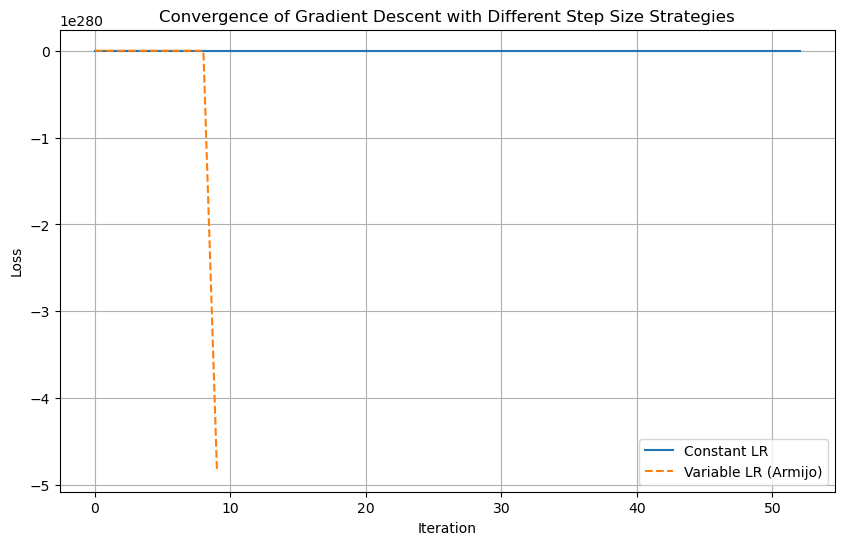

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function
def loss_function(x):
    return x**2 * np.cos(x) + np.sin(x) - x

# Gradient of the loss function (for demonstration purposes)
def gradient(x):
    return (2 * x * np.cos(x) - x**2 * np.sin(x) - 1)

# Gradient Descent with a constant step size
def gradient_descent_constant_lr(lr, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    iterations = [0]  # Store the iteration number

    for i in range(1, max_iterations + 1):
        x -= lr * gradient(x)
        x_values.append(x)
        loss = loss_function(x)
        losses.append(loss)
        iterations.append(i)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return iterations, x_values, losses

# Gradient Descent with a variable step size (Armijo-Goldstein condition)
def gradient_descent_variable_lr(c, max_iterations=1000, tol=1e-6):
    x = 2.0  # Initial guess
    x_values = [x]
    losses = [loss_function(x)]
    iterations = [0]  # Store the iteration number

    for i in range(1, max_iterations + 1):
        gradient_x = gradient(x)
        alpha = 1.0  # Initial step size
        while loss_function(x - alpha * gradient_x) > loss_function(x) - c * alpha * np.linalg.norm(gradient_x)**2:
            alpha *= 0.5  # Reduce step size by half
        x -= alpha * gradient_x
        x_values.append(x)
        loss = loss_function(x)
        losses.append(loss)
        iterations.append(i)

        if abs(losses[-1] - losses[-2]) < tol:
            break

    return iterations, x_values, losses

# Run gradient descent for constant and variable step sizes
lr_constant = 0.1
c_armijo = 0.1

iterations_constant, x_values_constant, losses_constant = gradient_descent_constant_lr(lr_constant)
iterations_variable, x_values_variable, losses_variable = gradient_descent_variable_lr(c_armijo)

# Plot the convergence of both methods
plt.figure(figsize=(10, 6))
plt.plot(iterations_constant, losses_constant, label='Constant LR', linestyle='-')
plt.plot(iterations_variable, losses_variable, label='Variable LR (Armijo)', linestyle='--')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence of Gradient Descent with Different Step Size Strategies')
plt.legend()
plt.grid(True)
plt.show()
